# Homework 1
You should have downloaded the following files as well:
1. matrix.csv
2. stocks.csv

Goal: Practice basic usage of jupyter notebook, numpy, scipy, pandas, and matplotlib. 

If you are unfamiliar with how to use certain functions, look up the documentation online. This skill will be very useful, in general. Alternatively, seek help from your TAs.

## 1 Basic numpy
### 1.1 Load data with numpy
[1 pt] load "matrix.csv" as a numpy array named $\texttt{data}$. The imported array should be 20 rows by 3 columns. (Hint: You can use np.loadtxt(), make sure to specify correct delimiter argument.)

In [2]:
import numpy as np
data = np.loadtxt("matrix.csv", delimiter=',')

### 1.2 Row sum
1. [1 pt] Define array $\texttt{rowsum}$ where each entry represents the row sum of matrix. Print $\texttt{rowsum}$. (hint: use np.sum() function, make sure to use the correct axis)

In [3]:
rowsum = np.sum(data, axis=1)
print(rowsum)

[ 0.4844172  -2.50909969  1.30264396 -0.84740315  0.42729788 -2.15017789
 -0.47559022  2.54880877  0.09423786 -0.67330205 -1.77558698 -1.52911637
  0.77690753 -0.33742036  0.99610406  1.65417497  1.03753238 -1.84411077
  1.21671237  2.10183057]


2. [1 pt] Define array, $\texttt{idx}$, containing indices of rowsum that have values greater than 1. Print $\texttt{idx}$. (hint: use np.where() function)

In [4]:
idx = np.where(rowsum > 1)
print(idx)

(array([ 2,  7, 15, 16, 18, 19]),)


### 1.3 Compute length
Now, view each row of the 20 by 3 array as a vector in $\mathbb{R}^3$.

[1 pt] Find the (Euclidean) length of vector (i.e., each row), store it as $\texttt{distances}$. Print the $\texttt{distances}$. (You may compute it via formula or use numpy functions, in which case be careful you use the right arguments). 

In [13]:
distances = np.array([]) # empty array
print(data.shape)
for row in data:
    print("Row data: ",row)
    distances = np.append(distances,np.linalg.norm(row))
print(distances)
print(distances.shape)
# len(distances)


(20, 3)
Row data:  [ 1.62434536 -0.61175641 -0.52817175]
Row data:  [-1.07296862  0.86540763 -2.3015387 ]
Row data:  [ 1.74481176 -0.7612069   0.3190391 ]
Row data:  [-0.24937038  1.46210794 -2.06014071]
Row data:  [-0.3224172  -0.38405435  1.13376944]
Row data:  [-1.09989127 -0.17242821 -0.87785842]
Row data:  [ 0.04221375  0.58281521 -1.10061918]
Row data:  [1.14472371 0.90159072 0.50249434]
Row data:  [ 0.90085595 -0.68372786 -0.12289023]
Row data:  [-0.93576943 -0.26788808  0.53035547]
Row data:  [-0.69166075 -0.39675353 -0.6871727 ]
Row data:  [-0.84520564 -0.67124613 -0.0126646 ]
Row data:  [-1.11731035  0.2344157   1.65980218]
Row data:  [ 0.74204416 -0.19183555 -0.88762896]
Row data:  [-0.74715829  1.6924546   0.05080775]
Row data:  [-0.63699565  0.19091548  2.10025514]
Row data:  [0.12015895 0.61720311 0.30017032]
Row data:  [-0.35224985 -1.1425182  -0.34934272]
Row data:  [-0.20889423  0.58662319  0.83898341]
Row data:  [0.93110208 0.28558733 0.88514116]
[1.8143068  2.6827732

### 1.4 Plot histogram
Definition: A _density histogram_ is a histogram that is normalized so that the total area under the bars sums to unity. 

[2 pt] Using matplotlib, plot a density histogram of the length of vectors. Make your bins between 0.5 to 3.0, with increments of 0.5. (So, you should have 5 bins)

(array([0.1, 1.1, 0.4, 0.2, 0.2]),
 array([0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <BarContainer object of 5 artists>)

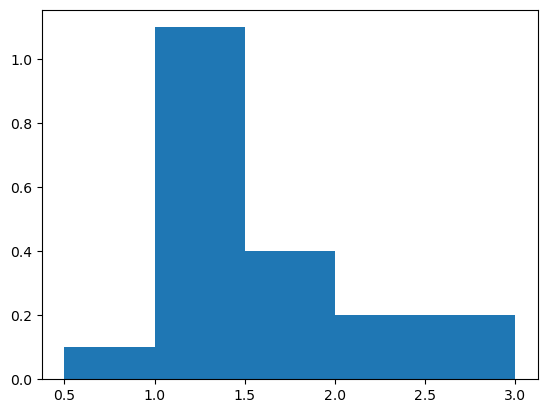

In [6]:
import matplotlib.pyplot as plt
plt.hist(distances, np.arange(0.5,3.5,0.5), density= True)


## 2 Sampling and statistics: stock returns
### 2.1 Load data with pandas
1. [1 pt] **Using pandas**, load "stocks.csv" on monthly stock returns from 1926 to 2021 ([source](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)) as $\texttt{stocks}$. (Hint: use the pandas read_csv() function)
2. [1 pt] Define numpy array $\texttt{ret}$ as the values of the "Mkt-RF" column in the dataset. (Hint: use the .values method.)

In [26]:
import pandas as pd

stocks = pd.read_csv("stocks.csv")
display(stocks)
ret = stocks["Mkt-RF"].values
print(ret.shape)
ret = ret.reshape(-1,1)
print(ret)
print(ret.shape)

,Mkt-RF,SMB,HML,RF
0,2.96,-2.56,-2.43,0.22
1,2.64,-1.17,3.82,0.25
2,0.36,-1.40,0.13,0.23
3,-3.24,-0.09,0.70,0.32
4,2.53,-0.10,-0.51,0.31
...,...,...,...,...
1160,2.51,-5.51,-8.85,0.36
1161,0.61,-3.35,-0.04,0.35
1162,0.35,1.61,-7.72,0.36
1163,6.46,1.54,-0.26,0.40


(1165,)
[[2.96]
 [2.64]
 [0.36]
 ...
 [0.35]
 [6.46]
 [3.21]]
(1165, 1)


### 2.2 Compute mean and std
1. [1 pt] Define $\texttt{n}$ as the number of entries/length of $\texttt{ret}$. You must use some function which extracts the length or shape of $\texttt{ret}$, i.e., not manually counting it.
2. [1 pt] Define $\texttt{ret\_mean}$ as the mean of $\texttt{ret}$.
3. [1 pt] Define $\texttt{ret\_std}$ as the unbiased estimate of standard deviation of $\texttt{ret}$.

(You can use numpy or scipy functions to compute them. Unbiased estimates of std will affect degree of freedom argument.)

In [8]:
import numpy as np

n = ret.size
print(n)
ret_mean = ret.mean()
print(ret_mean)
ret_std = np.std(ret, ddof=1)
print(ret_std)

1165
0.6785064377682404
5.344533755747503


### 2.3 Plot histogram
1. [2 pts] Plot a density histogram of the returns $\texttt{ret}$ with 100 equispaced bins from -30 to +40.

2. [2 pts] On the same axes/figure, plot the PDF of a normal distribution over the histogram, with
- mean equal to $\texttt{ret\_mean}$ and 
- standard deviation equal to $\texttt{ret\_std}$ 

(Hint: you can use scipy stats norm.pdf() function to help you)

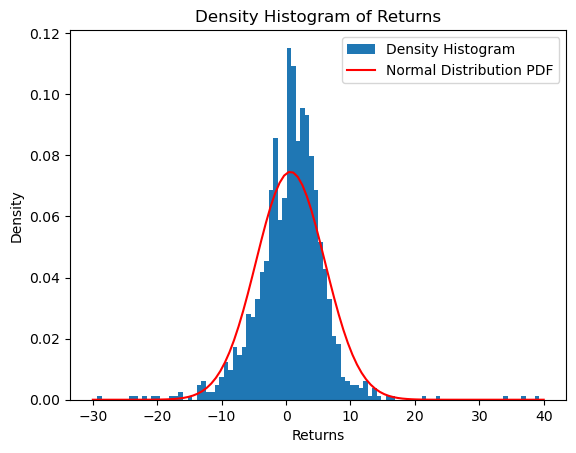

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot the density histogram
plt.hist(ret, bins=100, range=(-30, 40), density=True, label='Density Histogram')

# Set the labels and title
plt.xlabel('Returns')
plt.ylabel('Density')
plt.title('Density Histogram of Returns')

# Generate x values for the normal distribution PDF
x = np.linspace(-30, 40, 100)

# Compute the y vals of the normal distribution PDF based on x
y = norm.pdf(x,ret_mean,ret_std)

# Plot the PDF of the normal distribution
plt.plot(x, y, 'r', label='Normal Distribution PDF')

# Show the legend
plt.legend()
# Show the plot
plt.show()


### 2.4 Skew and Kurtosis of ret
[2 pt] What is the unbiased skew and kurtosis of $\texttt{ret}$? Compute and print them to 5 decimal places. (You may use scipy.stats skew and kurtosis functions.)



In [10]:
from scipy.stats import skew, kurtosis
print("Skewness: %.5f" % skew(ret,bias=False))
print("Kurtosis: %.5f" % kurtosis(ret,bias=False))



Skewness: 0.15628
Kurtosis: 7.45038


### 2.5 Generate data from normal distribution
[1 pt] Repeat the following 10 times with a for-loop:

1. [1 pt] Generate $n$ samples from the univariate normal distribution, storing it as $\texttt{sim\_data}$ with 
- mean equal $\texttt{ret\_mean}$ 
- standard deviation equal $\texttt{ret\_std}$
- random_state equal to the index $\texttt{i}$ of the for-loop

(You can use norm.rvs() function.)

2. [1 pt] What is the unbiased skew and kurtosis of these samples $\texttt{sim\_data}$? Print them to 5 decimal places, like in the previous part.

In [11]:
sim_data = np.array([])
for i in range(10):
    sim_data = np.append(sim_data, norm.rvs(ret_mean, ret_std, random_state=i))
    print("Skewness: %.5f" % skew(sim_data, bias=False))
    print("Kurtosis: %.5f" % kurtosis(sim_data, bias=False))




Skewness: nan
Kurtosis: nan
Skewness: 0.00000
Kurtosis: -2.00000
Skewness: -1.70657
Kurtosis: -1.50000
Skewness: -1.97320
Kurtosis: 3.90559
Skewness: -0.70222
Kurtosis: -2.68098
Skewness: -0.29938
Kurtosis: -2.39056
Skewness: 0.10980
Kurtosis: -2.44367
Skewness: -0.22003
Kurtosis: -2.32146
Skewness: 0.05358
Kurtosis: -2.24734
Skewness: 0.27993
Kurtosis: -2.08573


### 2.6 Discuss if ret data is normally distributed
[2 pt] Explain in what ways the stock returns do not resemble a normal distribution. Your response should compare skew and kurtosis you computed and the plots you generated in the previous parts.

**Ans:** The graph generated in part 2.3 relating to the stock returns appears to be leptokurtic (kurtosis = 7.45038) with thicker tails and higher sharper peaks when compared to a normal distribution which is symmetric,has a skew of 0, and a kurtosis of 3. Since the unbiased skew value is greater than zero (skew = 0.15628), the data is spread out more to the right in relation to a normal distribution.